In [27]:
import models.MLP.model as MLP
import models.MLP.experiments as experiments
import models.CNN.model as CNN
import models.MLP.layers as layers_file
import importlib
import numpy as np
from tqdm import tqdm
import torch

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import models.learning as L

transform_MNIST = transforms.Compose([
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.view(-1))
        ])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_MNIST)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_MNIST)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [28]:
import importlib

In [29]:
importlib.reload(MLP)

importlib.reload(L)

<module 'models.learning' from '/Users/isaac/Desktop/biological-deep-learning/models/learning.py'>

In [30]:
device = torch.device('cpu')

In [31]:
model = MLP.MLPBaseline_Model(64, 100, 0.005, 0.01, 1e-3, 0.99, 10, device, MLP.ClassifierLearning.Contrastive, MLP.Learning.FullyOrthogonal, MLP.WeightScale.WeightDecay)
model = experiments.TDBaseline_Experiment(1, model, train_dataloader, 'FashionMNIST', 10, device)

AttributeError: module 'models.MLP.model' has no attribute 'ClassifierLearning'

  0%|          | 0/60000 [00:00<?, ?it/s]

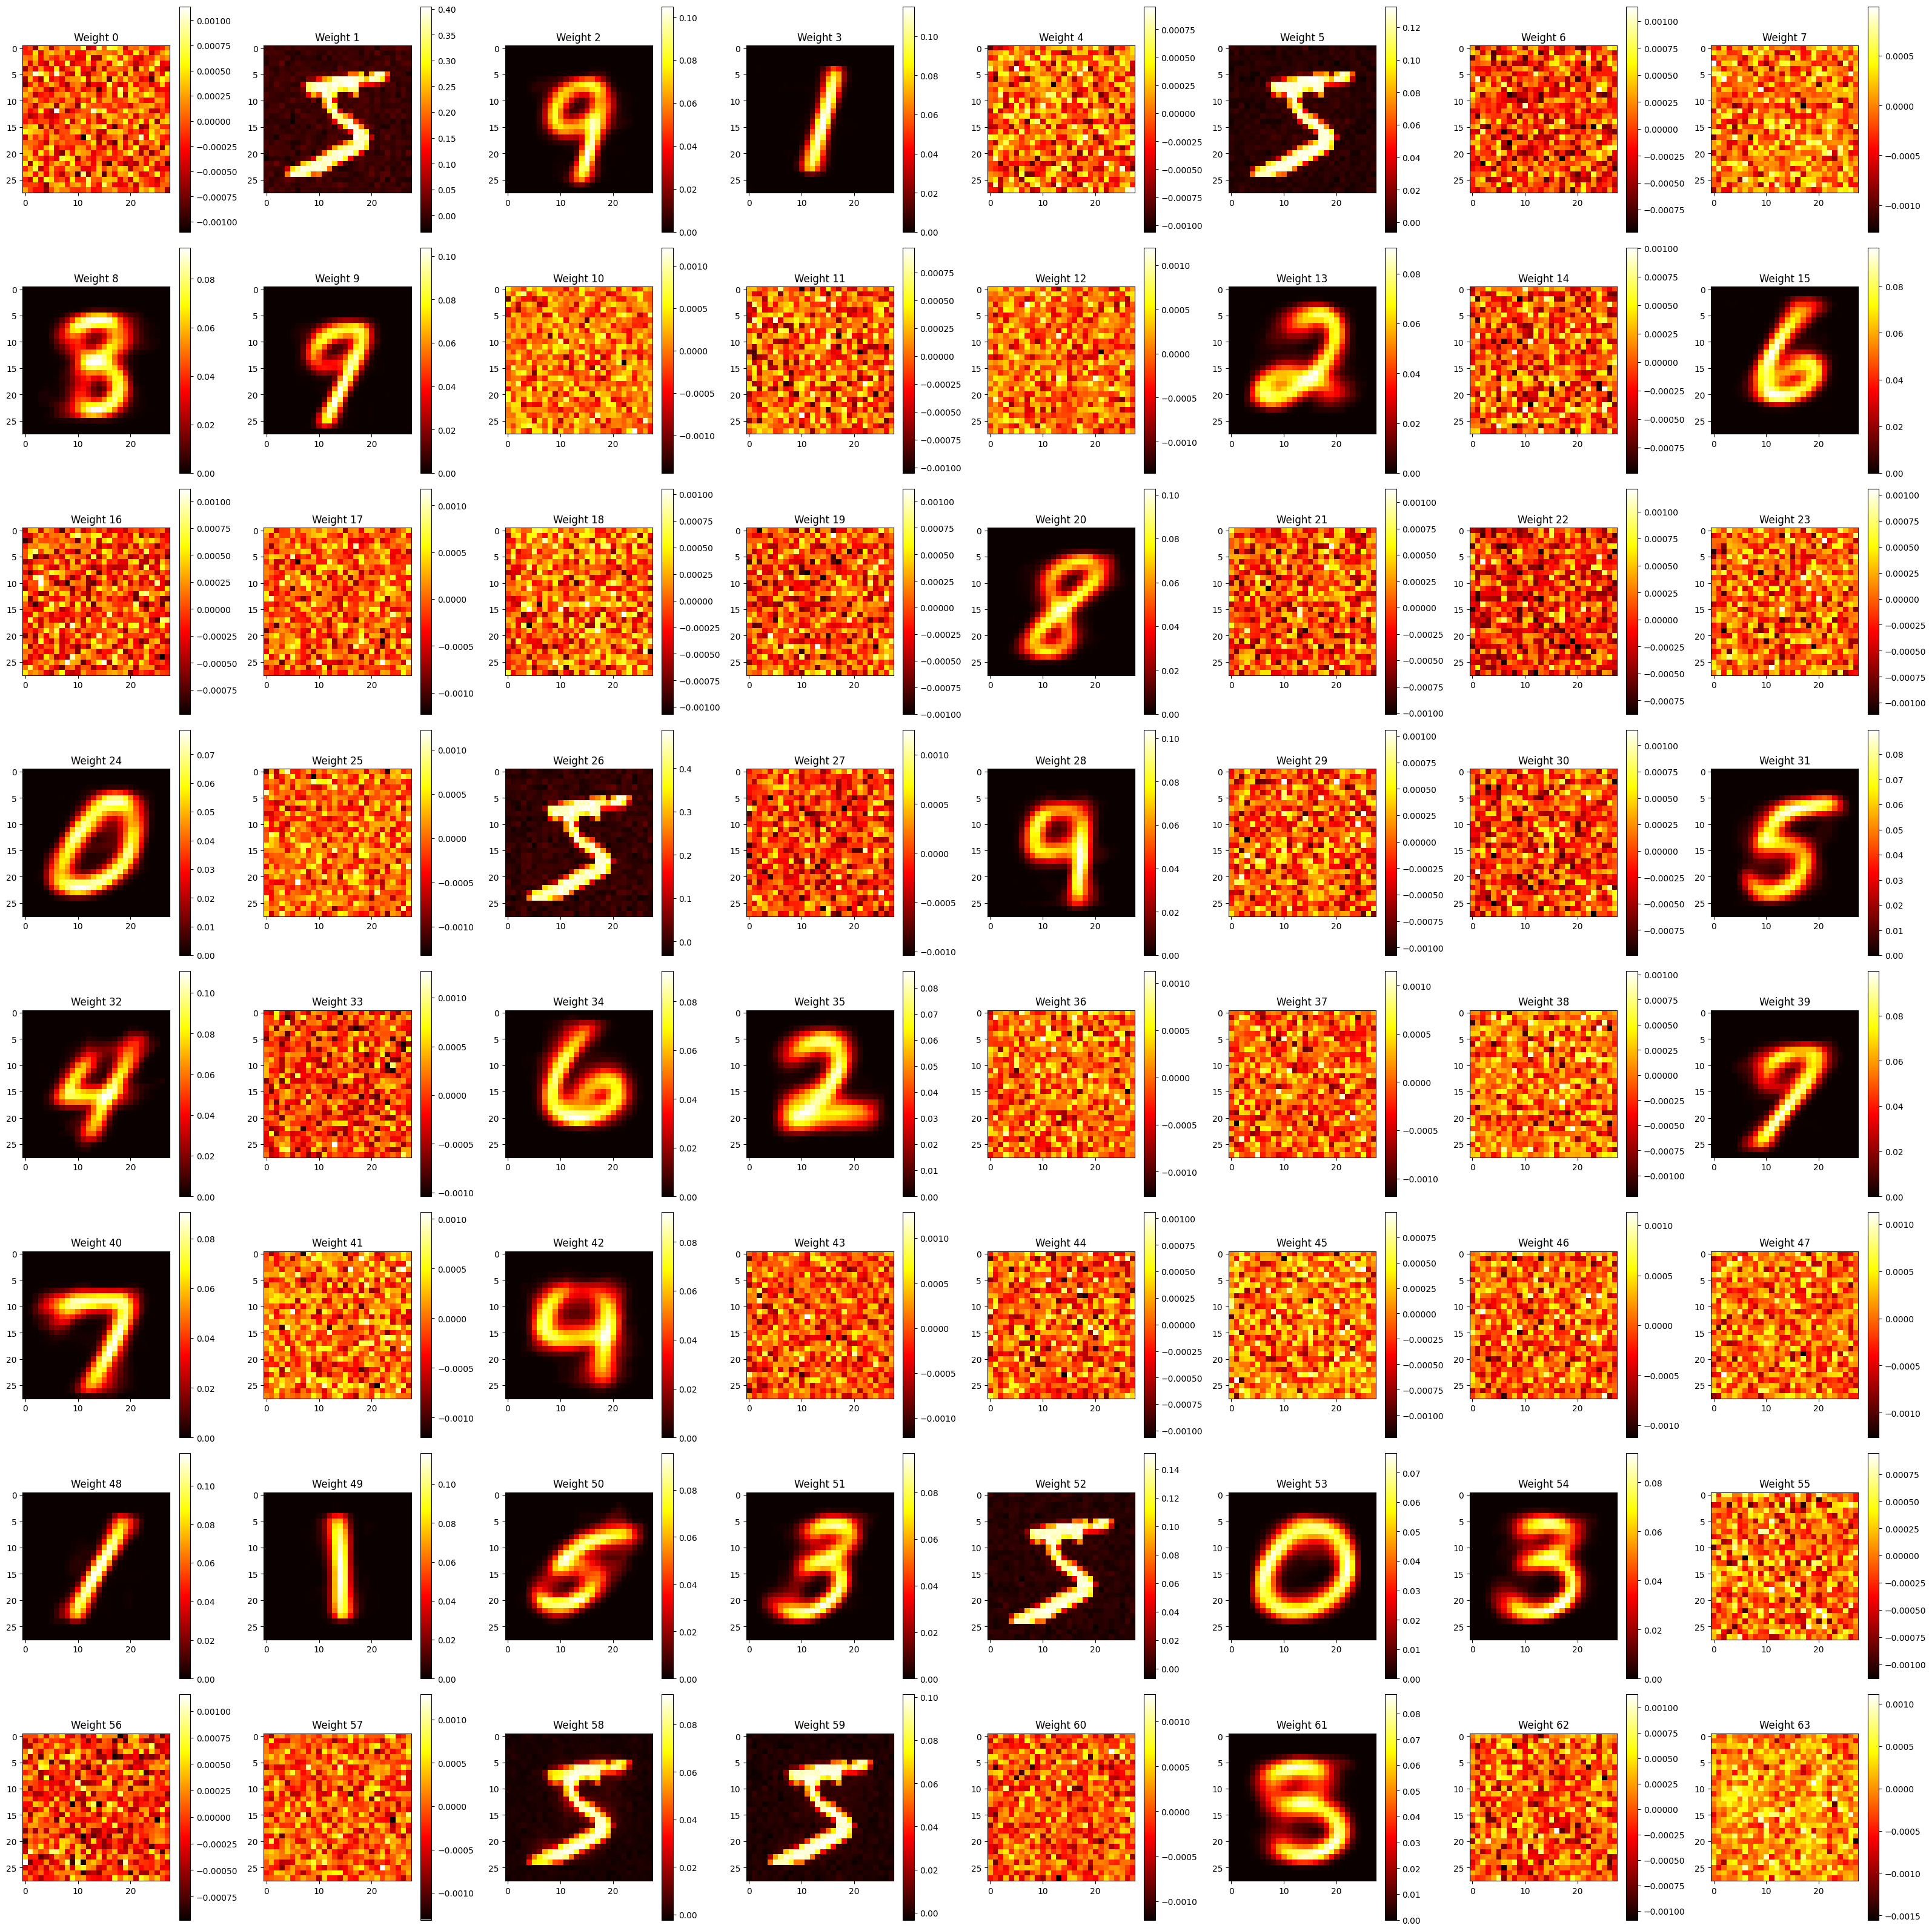

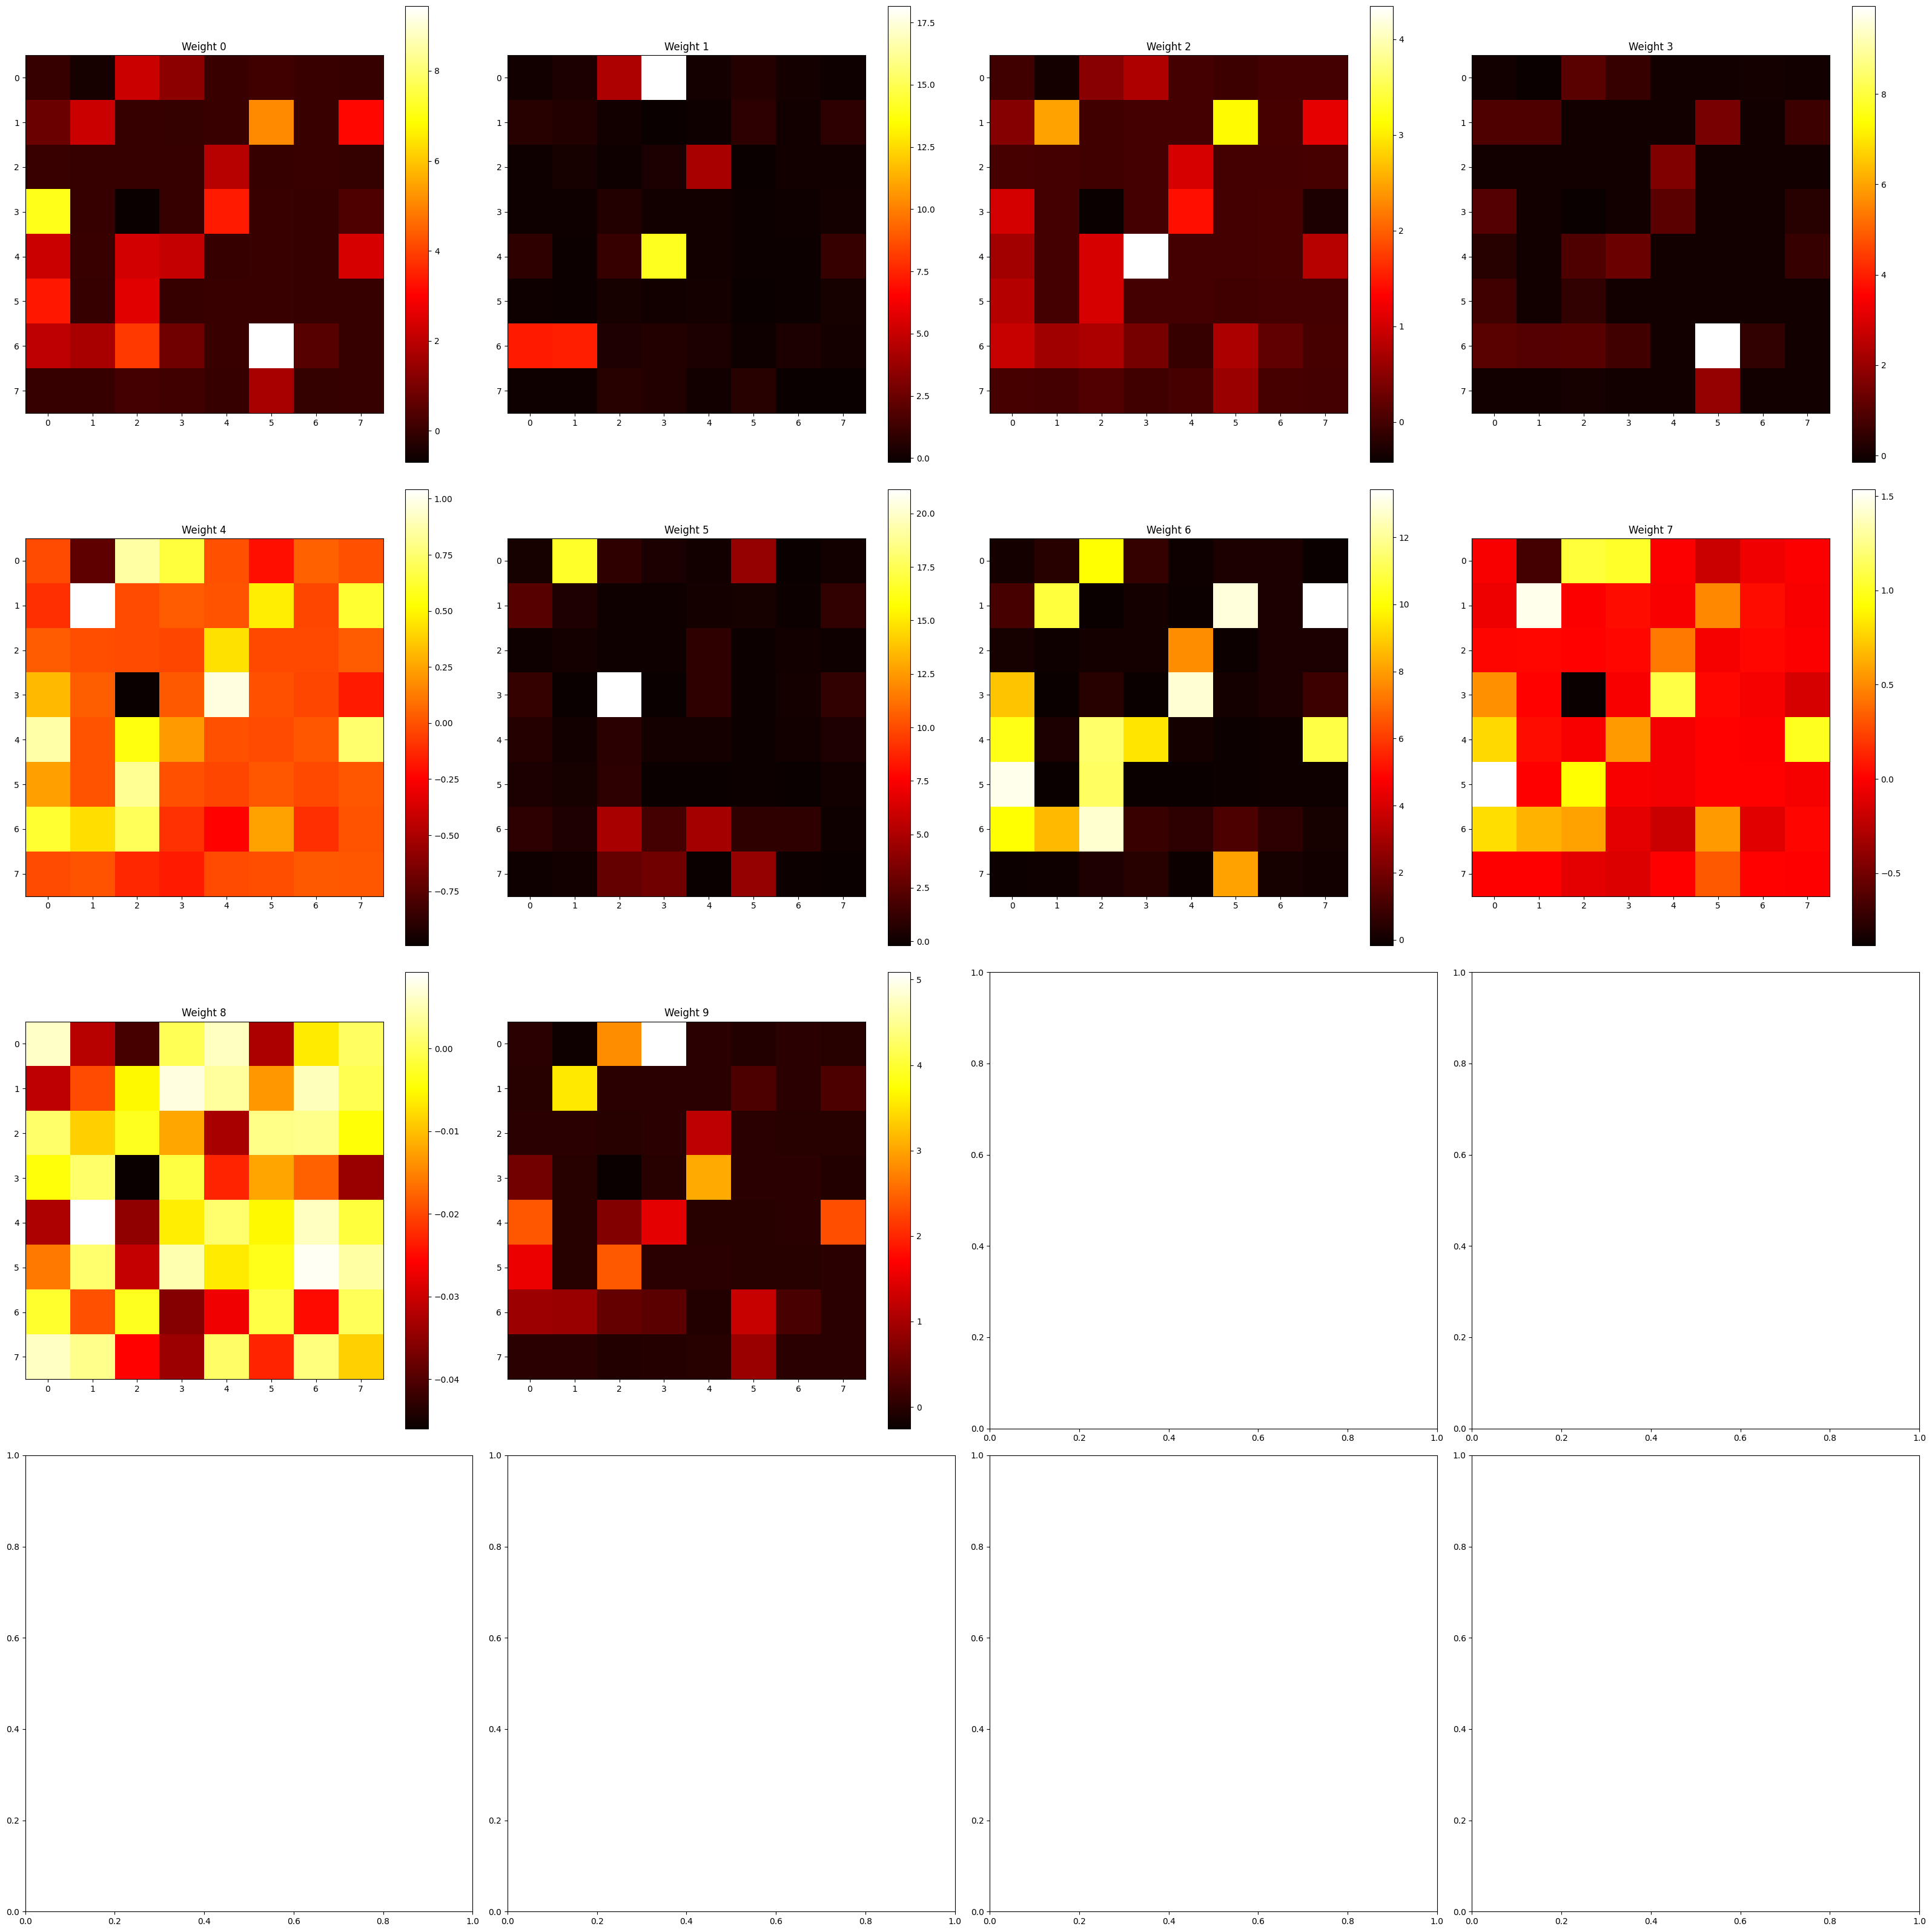

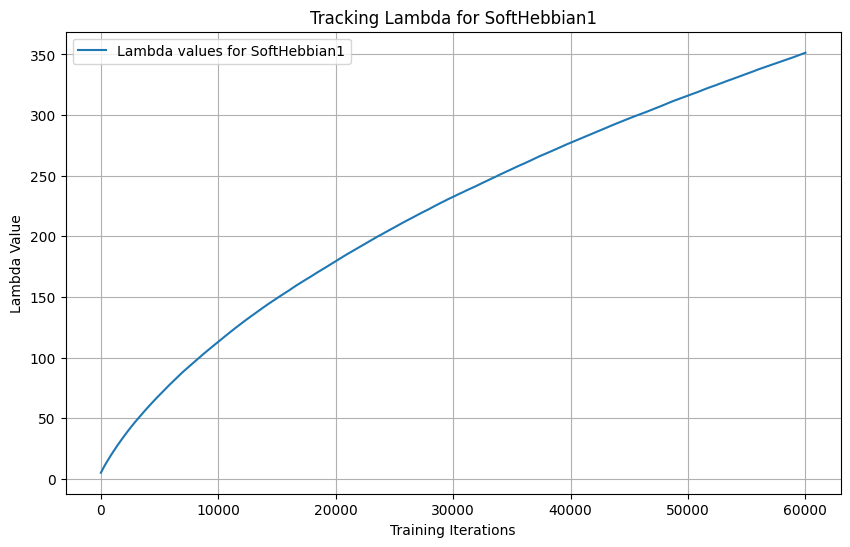

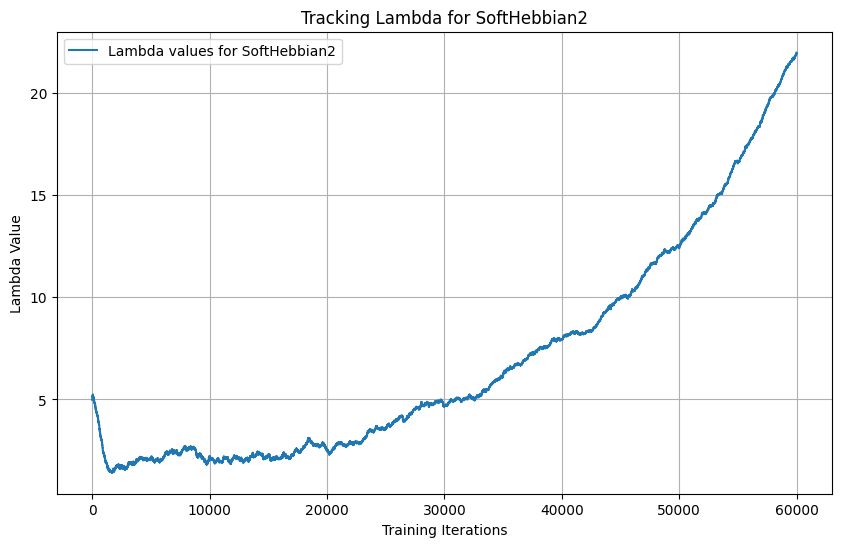

In [36]:
model = MLP.NewMLPBaseline_Model(hsize=64, lamb=5, w_lr=0.01, b_lr=0.01, l_lr=0.01, nclasses=10, device=device)
# Set greedytrain = true for layer wise training 
model = experiments.SoftMLPBaseline_Experiment(1, model, train_dataloader, 'MNIST', 10, device, greedytrain=False)

In [37]:
print("\nTesting the model...")
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation for testing
    for data in test_dataloader:  # Loop over the test set
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model.forward(inputs)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")


Testing the model...
Accuracy on the test set: 61.96%
